In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import random
import tqdm
import pims
import trackpy as tp

S:\anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
line = "C:\\Users\\Daniel Rybalko\\Desktop\\diploma\\trackpy_tests\\gt.json"
with open(line) as f:
    data = json.load(f)

In [17]:
rawmass = np.random.normal(0.1, 0.000001, 100)
mass = np.random.normal(0.5, 0.01, 100)
eps = np.random.normal(0.001, 0.0015, 100)
signal = np.random.normal(0, 0.001, 100)

In [18]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.open('C:\\Users\\Daniel Rybalko\\Desktop\\diploma\\trackpy_tests\\frames\\*.png'))

In [19]:
df_f = pd.DataFrame(columns = ['y', 'x', 'mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep', 'frame'])
for i in tqdm.tqdm(range(len(data))):  
    for frame in data[i]:
        for j in range(len(data[i][frame])):
            ecc = (1 - ((data[i][frame][j]['shorter']**2)/(data[i][frame][j]['longer']**2)))**0.5
            currmass = random.choice(mass)
            currrawmass = random.choice(rawmass)
            currsig = random.choice(signal)
            currep = random.choice(eps)
            curr = pd.DataFrame([[1024 - data[i][frame][j]['center'][1], data[i][frame][j]['center'][0], currmass, data[i][frame][j]['longer']/10, ecc, currsig, currrawmass, currep, i]], columns = ['y', 'x', 'mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep', 'frame'])
            df_f = df_f.append(curr, ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:33<00:00,  7.25it/s]


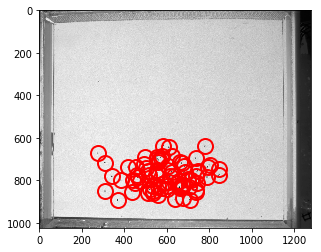

In [20]:
tp.annotate(df_f[df_f['frame'] == 0], frames[0])

In [6]:
t = tp.link(df_f, 21)

Frame 199: 76 trajectories present.


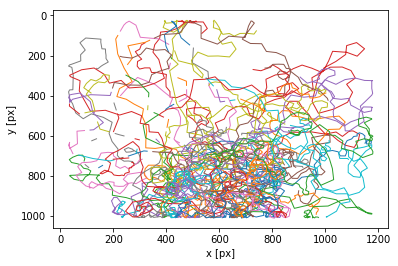

In [7]:
plt.figure()
tp.plot_traj(t);

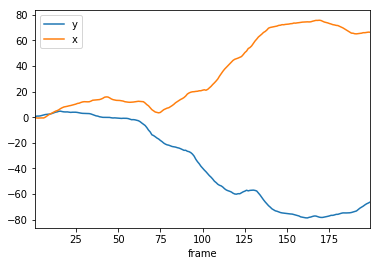

In [8]:
d = tp.compute_drift(t)
d.plot()
plt.show()

In [11]:
tm = tp.subtract_drift(t.copy(), d)

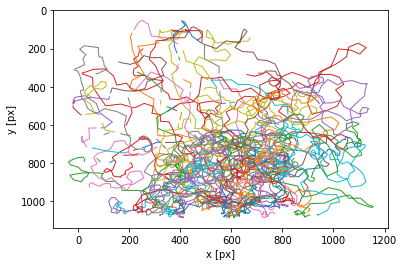

In [12]:
ax = tp.plot_traj(tm)
plt.show()

In [84]:
total_err = 0
total_err_number = 0
lost_traces = 0 
for j in range(0, 200):
    for i in range(0, 76):
        if len(tm[tm['particle']== i]) <= j:
            lost_traces += 1
            #print("lost " + str(i) + " daphnia on frame " + str(j))
        else:
            if [df_f[df_f['frame'] == j].loc[76*j + i].iat[1], df_f[df_f['frame'] == j].loc[76*j + i].iat[0]] != [tm[tm['particle']== i].loc[j].iat[1], tm[tm['particle']== i].loc[j].iat[0]]:
                total_err_number += 1
                total_err += ((df_f[df_f['frame'] == j].loc[76*j + i].iat[1] -  tm[tm['particle']== i].loc[j].iat[1])**2 + (df_f[df_f['frame'] == j].loc[76*j + i].iat[0] - tm[tm['particle']== i].loc[j].iat[0])**2)**0.5

print("total error in pixels " + str(total_err))
print("total number og trajectory missmatches " + str(total_err_number))
print("total number of lost traces" + str(lost_traces))

total error in pixels 5233994.8020495325
total number og trajectory missmatches 14115
total number of lost traces1084
